##전체 라이브러리

In [ ]:
import numpy as np                                     # 넘파이 패키지
import matplotlib.pyplot as plt                        # 그래프 패키지
from sklearn.model_selection import train_test_split   # 데이터 셋 분할

from sklearn.linear_model import LinearRegression      # 선형 회귀 패키지
from sklearn.linear_model import Ridge                 # 릿지 선형 회귀 패키지
from sklearn.preprocessing import PolynomialFeatures   # 특성 변환기 패키지
import pandas as pd                                    # 판다스 패키지
import tensorflow as tf                                # 인공지능 패키지

from keras.models import Sequential                    # 모델 생성
from keras.layers import Dense                         # 모델 층 추가
from keras import optimizers                           # 학습 알고리즘

from sklearn.metrics import mean_squared_error         # 평균 제곱근 에러(모델 평가 지수)

##데이터 셋 생성

In [ ]:
# 코랩과 구굴 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 코랩에서 데이터 셋 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week9/data/stock.csv')
print(data.info())            # 데이터 셋 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9287 entries, 0 to 9286
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   130     9287 non-null   int64
 1   130.1   9287 non-null   int64
 2   129     9287 non-null   int64
 3   111764  9287 non-null   int64
 4   129.1   9287 non-null   int64
dtypes: int64(5)
memory usage: 362.9 KB
None


In [ ]:
data = np.array(data)          # 데이터 프레임을 배열로 변환

In [ ]:
# 정규화 : 각 열 단위로 0 부터 1롤 변환
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
print(data.shape)              # 데이터 스케일 보기
print(data[0 : 5])             # 정규화 결과 보기

(9287, 5)
[[0.00022654 0.00022647 0.0002295  0.00033218 0.00021014]
 [0.00022654 0.00024389 0.0002295  0.00236327 0.00022765]
 [0.00022654 0.00022647 0.00021185 0.00258739 0.00019263]
 [0.00017426 0.0001742  0.00012358 0.00099453 0.00012258]
 [0.00013941 0.00015678 0.00015888 0.00141676 0.0001401 ]]


In [ ]:
# 데이터셋 만들기(주의 : 익일(다음날) 예측입니다)
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]              # 타겟 데이터(다음날 부터 마지막 샘플까지)

print(x_data.shape)                  # 학습 데이터 셋 스케일 보기
print(y_data.shape)

print(len(data) * 0.8)              # 학습 및 테스트 셋 분할하기 위해 샘플의 80% 확인

(9286, 5)
(9286,)
7429.6


In [ ]:
# 데이터 셋 만들기
x_train = x_data[ : 7400 ,  : ]         # 학습 입력(특성) 데이터 셋
y_train = y_data[ : 7400]               # 학습 타겟 데이터 셋

x_test = x_data[7400 : ,  : ]           # 테스트 입력(특성) 데이터 셋
y_test = y_data[7400 :]                 # 테스트 타겟 데이터 셋

print(x_train.shape)                    # 데이터 셋 스케일 보기
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7400, 5)
(7400,)
(1886, 5)
(1886,)


##인공신경망 다중회귀

입력층 - 출력 증

In [ ]:
# 모델 생성
model = Sequential()
model.add(Dense(1, input_dim = 5, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 콜백 함수
# 학습 중 오차가 제일 적은 모델 저장 : stock.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/stock.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 데이터 / 타겟 데이터
epochs = 10, batch_size = 1,                    # 학습 회수 / 1개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
7393/7400 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.0016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7400/7400 [==============================] - 11s 1ms/step - loss: 0.0148 - accuracy: 0.0016 - val_loss: 0.1822 - val_accuracy: 0.0000e+00
Epoch 2/10
7400/7400 [==============================] - 10s 1ms/step - loss: 0.0044 - accuracy: 0.0016 - val_loss: 0.0526 - val_accuracy: 5.3022e-04
Epoch 3/10
7400/7400 [==============================] - 10s 1ms/step - loss: 0.0014 - accuracy: 0.0016 - val_loss: 0.0138 - val_accuracy: 5.3022e-04
Epoch 4/10
7400/7400 [==============================] - 10s 1ms/step - loss: 4.8336e-04 - accuracy: 0.0016 - val_loss: 0.0034 - val_accuracy: 5.3022e-04
Epoch 5/10
7400/7400 [==============================] - 10s 1ms/step - loss: 2.0232e-04 - accuracy: 0.0016 - val_loss: 6.4831e-04 - val_accuracy: 5.3022e-04
Epoch 6/10
7400/7400 [==============================] - 10s 1ms/step - loss: 1.1268e-04 - accuracy: 0.0016 - val_loss: 1.3957e-04 - val_accuracy: 5.3022e-04
Epoch 7/10
7400/7400 [==============================] - 10s 1ms/step - loss: 8.1867e-05 - accurac

In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MSE  : ", mse)
print("RMSE : ", rmse)

59/59 [==============================] - 0s 1ms/step
MSE  :  0.00026346270176148557
RMSE :  0.016231534177688984


입력층 - 1층 - 출력증 모델

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = 5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 48        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 콜백 함수
# 학습 중 오차가 제일 적은 모델 저장 : stock.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/stock.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 데이터 / 타겟 데이터
epochs = 10, batch_size = 1,                    # 학습 회수 / 1개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
7359/7400 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.0016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7400/7400 [==============================] - 11s 1ms/step - loss: 0.0071 - accuracy: 0.0016 - val_loss: 0.2830 - val_accuracy: 0.0000e+00
Epoch 2/10
7400/7400 [==============================] - 11s 1ms/step - loss: 0.0013 - accuracy: 0.0016 - val_loss: 0.2000 - val_accuracy: 0.0000e+00
Epoch 3/10
7400/7400 [==============================] - 11s 1ms/step - loss: 4.9555e-04 - accuracy: 0.0016 - val_loss: 0.1596 - val_accuracy: 0.0000e+00
Epoch 4/10
7400/7400 [==============================] - 10s 1ms/step - loss: 2.4774e-04 - accuracy: 0.0016 - val_loss: 0.1370 - val_accuracy: 0.0000e+00
Epoch 5/10
7400/7400 [==============================] - 10s 1ms/step - loss: 1.6695e-04 - accuracy: 0.0016 - val_loss: 0.1236 - val_accuracy: 0.0000e+00
Epoch 6/10
7400/7400 [==============================] - 11s 1ms/step - loss: 1.3260e-04 - accuracy: 0.0016 - val_loss: 0.1147 - val_accuracy: 0.0000e+00
Epoch 7/10
7400/7400 [==============================] - 11s 1ms/step - loss: 1.1317e-04 - accuracy: 0

In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MSE  : ", mse)
print("RMSE : ", rmse)

59/59 [==============================] - 0s 1ms/step
MSE  :  0.09572566773171177
RMSE :  0.3093956491803202


입력층 - 1층 - 2층 - 출력증 모델

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = 5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 48        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 콜백 함수
# 학습 중 오차가 제일 적은 모델 저장 : stock.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/stock.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 데이터 / 타겟 데이터
epochs = 10, batch_size = 1,                    # 학습 회수 / 1개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
7359/7400 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.0016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7400/7400 [==============================] - 11s 2ms/step - loss: 0.0060 - accuracy: 0.0016 - val_loss: 0.1537 - val_accuracy: 0.0000e+00
Epoch 2/10
7400/7400 [==============================] - 11s 2ms/step - loss: 0.0030 - accuracy: 0.0016 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 3/10
7400/7400 [==============================] - 11s 2ms/step - loss: 0.0015 - accuracy: 0.0016 - val_loss: 0.0542 - val_accuracy: 5.3022e-04
Epoch 4/10
7400/7400 [==============================] - 11s 1ms/step - loss: 8.8245e-04 - accuracy: 0.0016 - val_loss: 0.0342 - val_accuracy: 5.3022e-04
Epoch 5/10
7400/7400 [==============================] - 11s 1ms/step - loss: 6.0605e-04 - accuracy: 0.0016 - val_loss: 0.0239 - val_accuracy: 5.3022e-04
Epoch 6/10
7400/7400 [==============================] - 11s 1ms/step - loss: 4.7274e-04 - accuracy: 0.0016 - val_loss: 0.0182 - val_accuracy: 5.3022e-04
Epoch 7/10
7400/7400 [==============================] - 11s 2ms/step - loss: 3.9606e-04 - accuracy: 0.001

In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MSE  : ", mse)
print("RMSE : ", rmse)

59/59 [==============================] - 0s 1ms/step
MSE  :  0.00900741550720654
RMSE :  0.09490740491240154


입력층 - 1층 - 2층 - 3층 - 출력증 모델

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = 5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 콜백 함수
# 학습 중 오차가 제일 적은 모델 저장 : stock.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/stock.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 데이터 / 타겟 데이터
epochs = 10, batch_size = 1,                    # 학습 회수 / 1개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
7371/7400 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.0016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7400/7400 [==============================] - 12s 2ms/step - loss: 0.0030 - accuracy: 0.0016 - val_loss: 0.1354 - val_accuracy: 0.0000e+00
Epoch 2/10
7400/7400 [==============================] - 11s 1ms/step - loss: 6.6134e-04 - accuracy: 0.0016 - val_loss: 0.1107 - val_accuracy: 0.0000e+00
Epoch 3/10
7400/7400 [==============================] - 11s 1ms/step - loss: 4.9625e-04 - accuracy: 0.0016 - val_loss: 0.0978 - val_accuracy: 0.0000e+00
Epoch 4/10
7400/7400 [==============================] - 11s 2ms/step - loss: 4.1097e-04 - accuracy: 0.0016 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 5/10
7400/7400 [==============================] - 11s 2ms/step - loss: 3.4920e-04 - accuracy: 0.0016 - val_loss: 0.0842 - val_accuracy: 0.0000e+00
Epoch 6/10
7400/7400 [==============================] - 11s 2ms/step - loss: 2.9766e-04 - accuracy: 0.0016 - val_loss: 0.0790 - val_accuracy: 0.0000e+00
Epoch 7/10
7400/7400 [==============================] - 12s 2ms/step - loss: 2.5555e-04 - accurac

In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MSE  : ", mse)
print("RMSE : ", rmse)

59/59 [==============================] - 0s 1ms/step
MSE  :  0.0663829820793477
RMSE :  0.25764895124829773


##하이퍼 파라메터 적용

In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim = 5, kernel_initializer='he_uniform', activation='relu'))
#model.add(BatchNormalization())    # 배치 정규화(Batch Normalization)
model.add(Dropout(0.3))                # 드롭 아웃(Drop-out)

model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
#model.add(BatchNormalization())    # 배치 정규화(Batch Normalization)
model.add(Dropout(0.3))                # 드롭 아웃(Drop-out)

model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
#model.add(BatchNormalization())    # 배치 정규화(Batch Normalization)
model.add(Dropout(0.3))                # 드롭 아웃(Drop-out)

model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                192       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])

# 콜백 함수
# 학습 중 오차가 제일 적은 모델 저장 : stock.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/stock.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 데이터 / 타겟 데이터
epochs = 10, batch_size = 1,                    # 학습 회수 / 1개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
7383/7400 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.0016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7400/7400 [==============================] - 14s 2ms/step - loss: 0.0026 - accuracy: 0.0016 - val_loss: 0.0252 - val_accuracy: 5.3022e-04
Epoch 2/10
7400/7400 [==============================] - 13s 2ms/step - loss: 0.0013 - accuracy: 0.0016 - val_loss: 0.0592 - val_accuracy: 5.3022e-04
Epoch 3/10
7400/7400 [==============================] - 13s 2ms/step - loss: 0.0012 - accuracy: 0.0016 - val_loss: 0.0618 - val_accuracy: 5.3022e-04
Epoch 4/10
7400/7400 [==============================] - 13s 2ms/step - loss: 0.0011 - accuracy: 0.0016 - val_loss: 0.0685 - val_accuracy: 5.3022e-04


In [ ]:
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MSE  : ", mse)
print("RMSE : ", rmse)

59/59 [==============================] - 0s 1ms/step
MSE  :  0.08002261060111843
RMSE :  0.2828826799242372


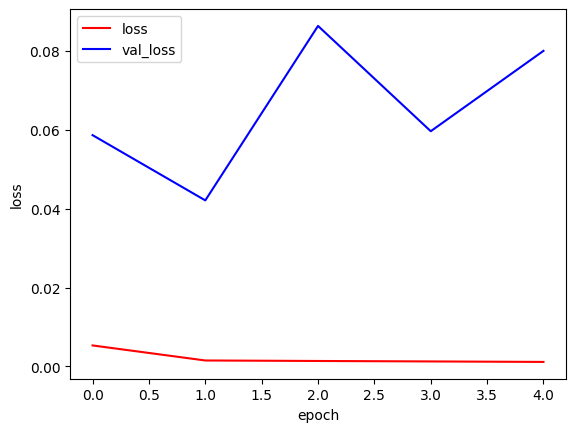

In [ ]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

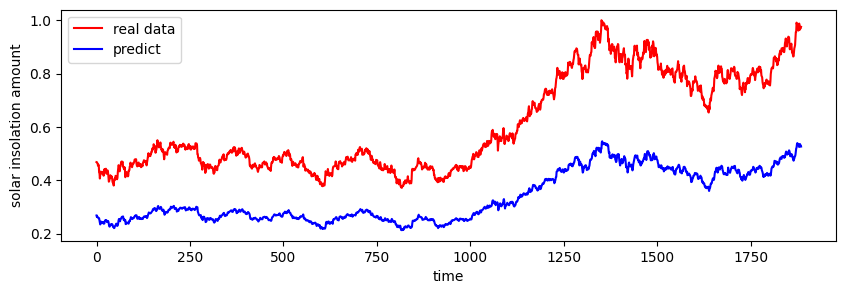

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 1886], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 1886], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()